## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
from skimage import io
import pathlib
from tqdm import tqdm
import os

## Plot a single image

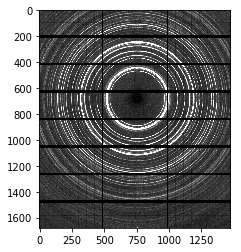

In [2]:
image = io.imread('example data/00001_00000.tiff')
plt.imshow(image, cmap='gray', vmin = 0, vmax = 500);

In [3]:
image_array = np.array(image, dtype='int32')
print(image_array)

[[168 125 157 ... 122 178  -2]
 [161 124 131 ... 123  94  -2]
 [117 146 125 ... 107 102  86]
 ...
 [104 105  73 ... 113 118 133]
 [160  78  68 ...  -2 121 126]
 [143 102  64 ... 119 112 138]]


In [4]:
image_array.dtype

dtype('int32')

## Average multiple images (example)

In [17]:
def avg_tiff_images(experiment_name: str, input_filepath: str, output_filepath: str):
    '''This function sums up the intensities of all the tiff images contained in the input folder
    and saves a single average tiff image to the output folder
    '''

    image_list = sorted(pathlib.Path(input_filepath).glob("0*.tiff"))
    image_example = io.imread(image_list[1])
    sum_image_array = np.empty(shape=np.shape(image_example), dtype='int32')

    for image_path in tqdm(image_list):
        image = io.imread(image_path)
        image_array = np.array(image)
        sum_image_array = sum_image_array + image_array

    average_image_array = sum_image_array / len(image_list)
    # convert to integer 32 bit array
    avg_int_image_array = average_image_array.astype('int32')
    plt.imshow(avg_int_image_array, cmap='gray', vmin = 0, vmax = 500);
    
    # check if the output directory exists and if not create it
    CHECK_FOLDER = os.path.isdir(f"{output_filepath}")

    if not CHECK_FOLDER:
        os.makedirs(f"{output_filepath}")
        print(f"created folder : '{output_filepath}'.")

    else:
        print(f"'{output_filepath}' folder already exists.")

    # save the image
    io.imsave(f"{output_filepath}{experiment_name}_summed.tiff", avg_int_image_array)
    
    print(f"Written .tiff image to: '{output_filepath}'.")

100%|██████████| 10/10 [00:00<00:00, 12.20it/s]


'example result/' folder already exists.
Written .tiff image to: 'example result/'.


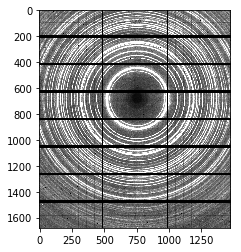

In [18]:
experiment_name = '103845'
input_filepath = 'example data/'
output_filepath = 'example result/'

avg_tiff_images(experiment_name, input_filepath, output_filepath)

dtype('int32')

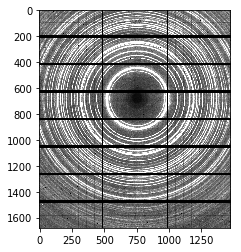

In [19]:
image=io.imread(f"{output_filepath}{experiment_name}_summed.tiff")
plt.imshow(image, cmap='gray', vmin = 0, vmax = 500);
image.dtype

## Average multiple images

In [8]:
pwd

'/Users/mbcx9cd4/Documents/GitHub/sxrd-tiff-summer'

In [9]:
experiment_number_start = 103828
experiment_number_end = 103851

for experiment_number in range (experiment_number_start, experiment_number_end + 1):
    experiment_name = str(experiment_number)
    input_filepath = f"../../SXRD_raw_data/diamond_2021/rawdata_tiffs/{experiment_name}_tiffs/"
    output_filepath = f"../../SXRD_analysis/diamond_2021/{experiment_name}/texture-cpf/" 
    avg_tiff_images(experiment_name, input_filepath, output_filepath)

IndexError: list index out of range

In [ ]:
experiment_name = '103851'

image=io.imread(f"../../SXRD_analysis/diamond_2021/{experiment_name}/texture-cpf/{experiment_name}_summed.tiff")
plt.imshow(image, cmap='gray', vmin = 0, vmax = 500);
image.dtype